<a href="https://colab.research.google.com/github/universeatmyfeet/DL/blob/master/Test/J051_DL_LabTest2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## J051 - Salonii Tari - DL test 2

In [0]:
import numpy as np
import cv2
import PIL.Image
import os
import pandas as pd

In [0]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
# to ignore  the warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline  
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import tensorflow as tf
import random as rn
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image
from skimage.io import imread, imsave
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
!unzip "/content/drive/My Drive/UCMerced_LandUse.zip"

In [0]:
x=[]
z=[]
img_size=150

In [0]:
AGRICULTURAL_DIR='/content/UCMerced_LandUse/Images/agricultural'
AIRPLANE_DIR='/content/UCMerced_LandUse/Images/airplane'
BASEBALLDIAMOND_DIR='/content/UCMerced_LandUse/Images/baseballdiamond'
BEACH_DIR='/content/UCMerced_LandUse/Images/beach'
BUILDINGS_DIR='/content/UCMerced_LandUse/Images/buildings'
CHAPARRAL_DIR='/content/UCMerced_LandUse/Images/chaparral'
DENSERESIDENTIAL_DIR='/content/UCMerced_LandUse/Images/denseresidential'
FOREST_DIR='/content/UCMerced_LandUse/Images/forest'
FREEWAY_DIR='/content/UCMerced_LandUse/Images/freeway'
GOLFCOURSE_DIR='/content/UCMerced_LandUse/Images/golfcourse'
HARBOR_DIR='/content/UCMerced_LandUse/Images/harbor'
INTERSECTION_DIR='/content/UCMerced_LandUse/Images/intersection'
MEDIUMRESIDENTIAL_DIR='/content/UCMerced_LandUse/Images/mediumresidential'
MOBILEHOMEPARK_DIR='/content/UCMerced_LandUse/Images/mobilehomepark'
OVERPASS_DIR='/content/UCMerced_LandUse/Images/overpass'
PARKINGLOT_DIR='/content/UCMerced_LandUse/Images/parkinglot'
RIVER_DIR='/content/UCMerced_LandUse/Images/river'
RUNWAY_DIR='/content/UCMerced_LandUse/Images/runway'
SPARSERESIDENTIAL_DIR='/content/UCMerced_LandUse/Images/sparseresidential'
STORAGETANKS_DIR='/content/UCMerced_LandUse/Images/storagetanks'
TENNISCOURT_DIR='/content/UCMerced_LandUse/Images/tenniscourt'

In [0]:
plt.imshow(imread('/content/UCMerced_LandUse/Images/airplane/airplane00.tif'))
plt.show()

NameError: ignored

In [0]:
def give_label(img,image_type):
    return image_type

In [0]:
def make_train_data(image_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label= give_label(img,image_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (img_size,img_size))
        
        x.append(np.array(img))
        z.append(str(label))

In [0]:
from tqdm import tqdm

In [0]:
make_train_data('Agricultural',AGRICULTURAL_DIR)
print(len(x))

100%|██████████| 100/100 [00:00<00:00, 1113.51it/s]

100


In [0]:
make_train_data('Airplane',AIRPLANE_DIR)
print(len(x))

100%|██████████| 100/100 [00:00<00:00, 1558.38it/s]

200


In [0]:
make_train_data('Baseball Diamond',BASEBALLDIAMOND_DIR)
print(len(x))

100%|██████████| 100/100 [00:00<00:00, 1699.69it/s]

300


In [0]:
make_train_data('Beach',BEACH_DIR)
print(len(x))

100%|██████████| 100/100 [00:00<00:00, 1758.98it/s]

400


In [0]:
make_train_data('Buildings',BUILDINGS_DIR)
print(len(x))

100%|██████████| 100/100 [00:00<00:00, 1541.86it/s]

500


In [0]:
make_train_data('Chaparral',CHAPARRAL_DIR)
print(len(x))

100%|██████████| 100/100 [00:00<00:00, 1774.39it/s]

600


In [0]:
make_train_data('Dense Residential',DENSERESIDENTIAL_DIR)
print(len(x))

100%|██████████| 100/100 [00:00<00:00, 1775.94it/s]

700


In [0]:
make_train_data('Forest',FOREST_DIR)
print(len(x))

100%|██████████| 100/100 [00:00<00:00, 1731.18it/s]

800


In [0]:
make_train_data('Freeway',FREEWAY_DIR)
print(len(x))

100%|██████████| 100/100 [00:00<00:00, 1782.53it/s]

900


In [0]:
make_train_data('Golf Course',GOLFCOURSE_DIR)
print(len(x))

100%|██████████| 100/100 [00:00<00:00, 1732.80it/s]

1000


In [0]:
make_train_data('Harbor',HARBOR_DIR)
print(len(x))

100%|██████████| 100/100 [00:00<00:00, 1749.62it/s]

1100


In [0]:
make_train_data('Intersection',INTERSECTION_DIR)
print(len(x))

100%|██████████| 100/100 [00:00<00:00, 1783.47it/s]


1200


In [0]:
make_train_data('Medium Residential',MEDIUMRESIDENTIAL_DIR)
print(len(x))

100%|██████████| 100/100 [00:00<00:00, 1700.29it/s]

1300


In [0]:
make_train_data('Mobile Home Park',MOBILEHOMEPARK_DIR)
print(len(x))

100%|██████████| 100/100 [00:00<00:00, 1760.43it/s]

1400


In [0]:
make_train_data('Overpass',OVERPASS_DIR)
print(len(x))

100%|██████████| 100/100 [00:00<00:00, 1722.29it/s]

1500


In [0]:
make_train_data('Parking Lot',PARKINGLOT_DIR)
print(len(x))

100%|██████████| 100/100 [00:00<00:00, 1375.87it/s]

1600


In [0]:
make_train_data('River',RIVER_DIR)
print(len(x))

100%|██████████| 100/100 [00:00<00:00, 1712.79it/s]

1700


In [0]:
make_train_data('Runway',RUNWAY_DIR)
print(len(x))

100%|██████████| 100/100 [00:00<00:00, 1715.76it/s]

1800


In [0]:
make_train_data('Sparse Residential',SPARSERESIDENTIAL_DIR)
print(len(x))

100%|██████████| 100/100 [00:00<00:00, 1631.68it/s]

1900


In [0]:
make_train_data('Storage Tanks',STORAGETANKS_DIR)
print(len(x))

100%|██████████| 100/100 [00:00<00:00, 1657.50it/s]

2000


In [0]:
make_train_data('Tennis Court',TENNISCOURT_DIR)
print(len(x))

100%|██████████| 100/100 [00:00<00:00, 1753.78it/s]

2100


In [0]:
le=LabelEncoder()

y=le.fit_transform(z)
y=to_categorical(y,21)

x=np.array(x)
x=x/255

In [0]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [0]:
np.random.seed(42)
rn.seed(42)
tf.set_random_seed(42)

In [0]:
# Model with Data Augmentation

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(21, activation = "softmax"))

In [0]:
batch_size=21
epochs=40

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [0]:
model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 96)       

In [0]:
#fits the model on batches with real-time data augmentation
History = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,y_test), 
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size)





Epoch 1/40





75/75 [==============================] - 23s 306ms/step - loss: 0.1912 - acc: 0.9523 - val_loss: 0.1824 - val_acc: 0.9523
Epoch 2/40
75/75 [==============================] - 8s 105ms/step - loss: 0.1788 - acc: 0.9522 - val_loss: 0.1715 - val_acc: 0.9481
Epoch 3/40
75/75 [==============================] - 8s 101ms/step - loss: 0.1611 - acc: 0.9528 - val_loss: 0.1462 - val_acc: 0.9536
Epoch 4/40
75/75 [==============================] - 8s 104ms/step - loss: 0.1444 - acc: 0.9546 - val_loss: 0.1342 - val_acc: 0.9555
Epoch 5/40
75/75 [==============================] - 8s 105ms/step - loss: 0.1323 - acc: 0.9567 - val_loss: 0.1239 - val_acc: 0.9585
Epoch 6/40
75/75 [==============================] - 8s 104ms/step - loss: 0.1211 - acc: 0.9596 - val_loss: 0.1166 - val_acc: 0.9619
Epoch 7/40
75/75 [==============================] - 8s 104ms/step - loss: 0.1075 - acc: 0.9621 - val_loss: 0.0927 - val_acc: 0.9663
Epoch 8/40
75/75 [==============================] - 8s 102ms/step -

In [0]:
# model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (X_test,y_test))

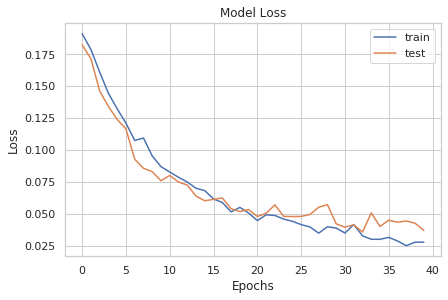

In [0]:
#Loss vs Epoch
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

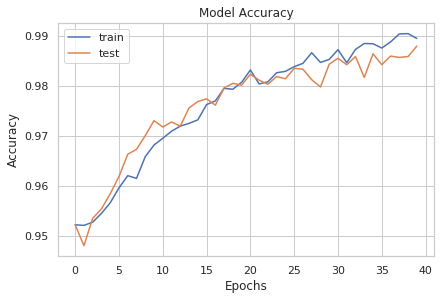

In [0]:
#Accuracy vs Epoch
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()


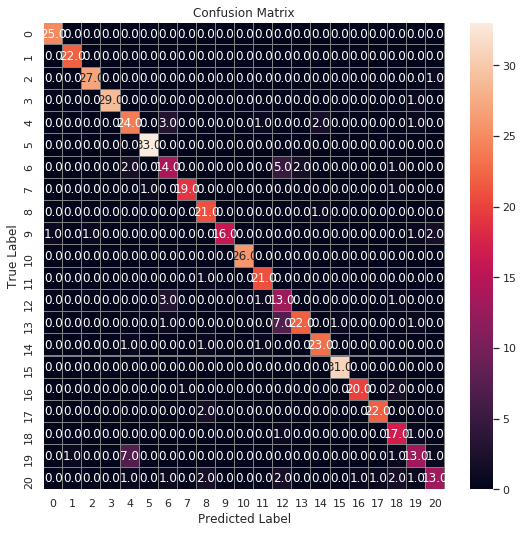

In [45]:

# Predict the values from the validation dataset
y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
conf_mtx = confusion_matrix(y_true, y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(conf_mtx, annot=True, linewidths=0.01,linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()